In [166]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
from shapely.geometry import Point, Polygon
from matplotlib.pyplot import figure


In [2]:
tree_data = pd.read_csv('data/parsed_data.csv')
tree_data

,Unnamed: 0,latitude,longitude,borough,zipcode,spc_latin,tree_diameter,wires,sidew_crack_raise,latBin,lonBin,lonDistance,latDistance,avg_health_round,avg_health
0,0,40.748590,-73.984927,Manhattan,10001,pyrus calleryana,4,0,0,40.7485,-73.9855,5.730000e-04,0.000090,3.0,3.000000
1,1,40.748747,-73.985308,Manhattan,10001,acer pseudoplatanus,10,0,0,40.7485,-73.9855,1.920000e-04,0.000247,3.0,3.000000
2,2,40.748458,-73.984609,Manhattan,10001,pyrus calleryana,4,0,0,40.7485,-73.9855,8.910000e-04,0.000042,3.0,3.000000
3,3,40.748458,-73.984609,Manhattan,10001,pyrus calleryana,4,0,0,40.7485,-73.9855,8.910000e-04,0.000042,3.0,3.000000
4,4,40.748458,-73.984609,Manhattan,10001,pyrus calleryana,3,0,0,40.7485,-73.9855,8.910000e-04,0.000042,3.0,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008854,544364,40.581102,-73.852954,Queens,11694,platanus acerifolia,16,0,1,40.5810,-73.8530,1.771800e-04,0.000005,3.0,3.000000
1008855,544365,40.579157,-73.845045,Queens,11694,acer platanoides,11,1,1,40.5790,-73.8455,8.304000e-05,0.000279,2.0,2.454545
1008856,544366,40.579157,-73.845045,Queens,11694,acer platanoides,14,1,1,40.5790,-73.8455,8.304000e-05,0.000279,2.0,2.454545
1008857,544367,40.579157,-73.845045,Queens,11694,acer platanoides,14,1,0,40.5790,-73.8455,8.304000e-05,0.000279,2.0,2.454545


In [ ]:
tree_data['latlonBin'] = tree_data['latBin'].astype('string') + tree_data['lonBin'].astype('string')


### A few attempts at creating a geo plot

In [125]:
crs = {'init':"EPSG:4326"}
geometry = [Point(xy) for xy in zip(tree_data['longitude'], tree_data['latitude'])]
geo_df = gpd.GeoDataFrame(tree_data,
 crs = crs,
 geometry = geometry)

/Users/kateharwood/opt/miniconda3/envs/climate/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [170]:
geo_df.head()
geo_df['latlonBin'].unique()
geo_df_section = geo_df[geo_df['latitude'] > 40.821]
geo_df_section = geo_df_section[geo_df['latitude'] < 40.824]
geo_df_section = geo_df_section[geo_df['longitude'] > -73.943]
geo_df_section = geo_df_section[geo_df['longitude'] < -73.937]

geo_df_section['latlonBin'].unique()

<StringArray>
[           '40.8215-73.943',            '40.821-73.9395',
             '40.8215-73.94',            '40.821-73.9405',
            '40.8215-73.941',           '40.8215-73.9415',
            '40.822-73.9405',           '40.8225-73.9425',
            '40.822-73.9425',             '40.8225-73.94',
             '40.823-73.938',           '40.8235-73.9415',
  '40.823-73.94200000000001',            '40.823-73.9405',
           '40.8225-73.9395',            '40.8235-73.943',
           '40.8225-73.9385',            '40.822-73.9385',
  '40.822-73.93900000000001',            '40.8235-73.938',
            '40.824-73.9375',             '40.822-73.943',
             '40.821-73.941',           '40.8235-73.9385',
            '40.823-73.9395', '40.8235-73.94200000000001',
           '40.8235-73.9405',  '40.823-73.93900000000001',
            '40.8235-73.941',              '40.822-73.94',
           '40.8225-73.9405',            '40.823-73.9385',
            '40.822-73.9375',           '4

In [ ]:
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
fig, ax = plt.subplots(figsize=(10,10))
nyc.plot(ax=ax, alpha=0.4,color='grey')
geo_df.plot(column='avg_health',ax=ax,alpha=0.5, legend=True,markersize=10)
plt.xlim(-74.3,-73.65)
plt.ylim(40.45,40.95)
plt.show()


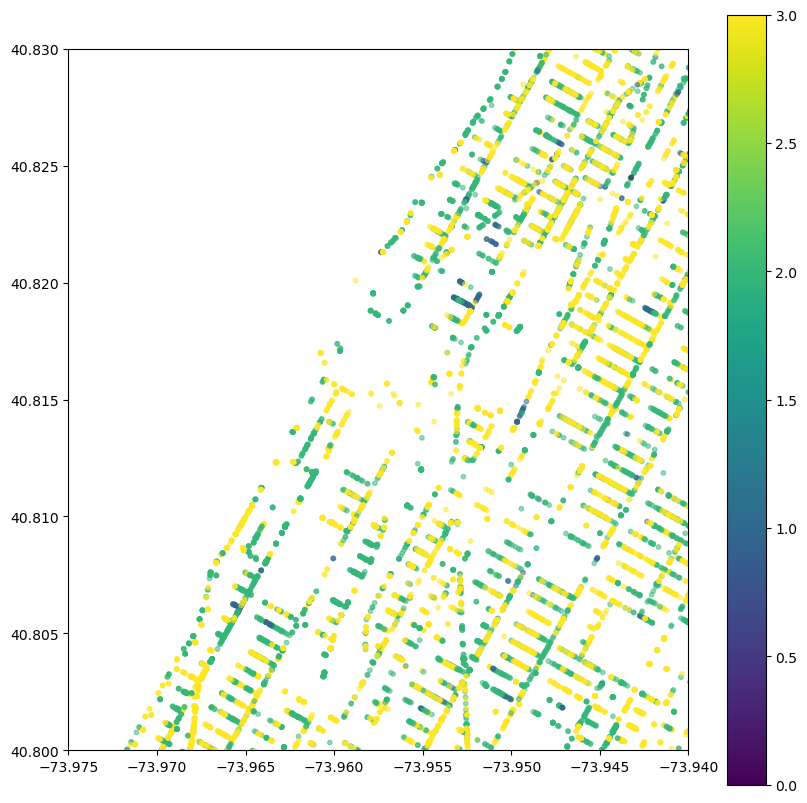

In [52]:
fig, ax = plt.subplots(figsize=(10,10))
nyc.plot(ax=ax, alpha=0.4,color='grey')
geo_df.plot(column='avg_health_round', ax=ax,alpha=0.5, legend=True,markersize=10)
plt.xlim(-73.975,-73.94)
plt.ylim( 40.8,40.83)
plt.show()


# Final Plots

#### Blue is healthier, red is unhealthier

### Average health continuous

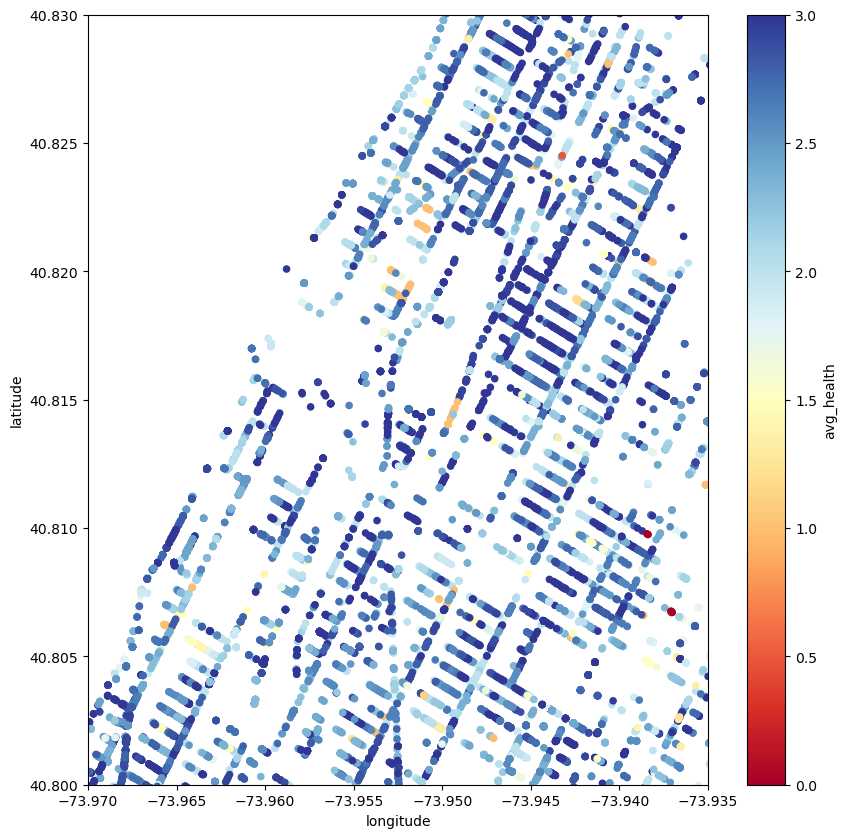

In [174]:
tree_data.plot(x="longitude", y="latitude", kind="scatter", c="avg_health",
        colormap="RdYlBu")
plt.xlim(-73.97,-73.935)
plt.ylim( 40.8,40.83)
plt.gcf().set_size_inches(10, 10)
plt.show()

### Average health rounded to discrete values (0, 1, 2, 3)

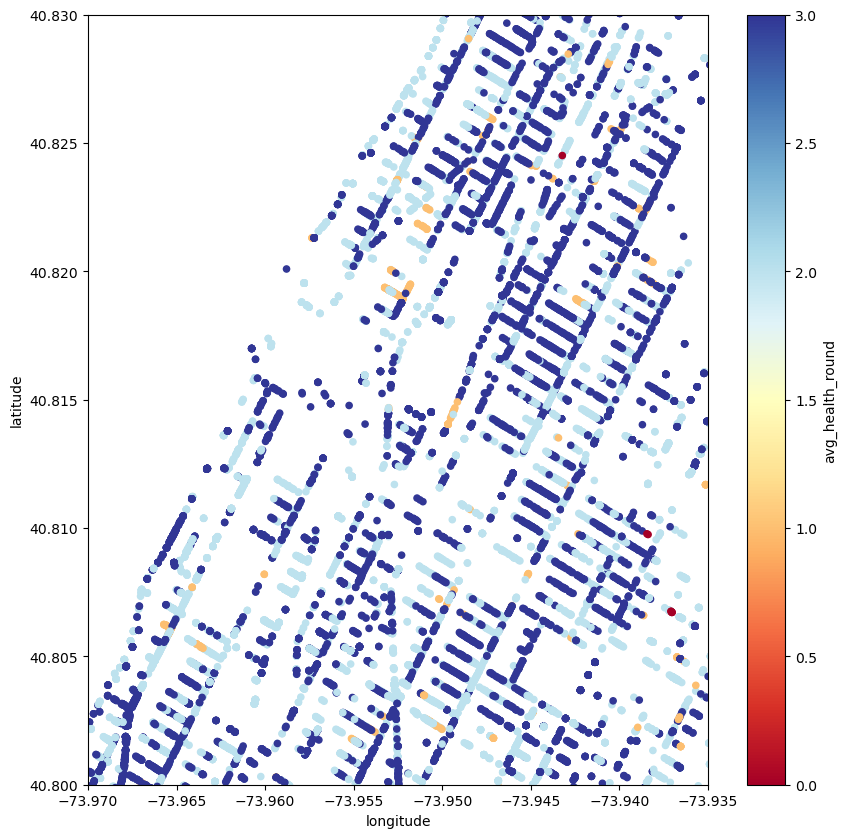

In [189]:

tree_data.plot(x="longitude", y="latitude", kind="scatter", c="avg_health_round",
        colormap="RdYlBu")
plt.xlim(-73.97,-73.935)
plt.ylim( 40.8,40.83)
plt.gcf().set_size_inches(10, 10)
plt.show()

In [ ]:

plt.scatter(x=geo_df_section["longitude"], y=geo_df_section["latitude"], cmap=geo_df_section["latlonBin"])
plt.gcf().set_size_inches(10, 10)
plt.show()
geo_df_section['latlonBin']

### Average health continuous, Binned trees

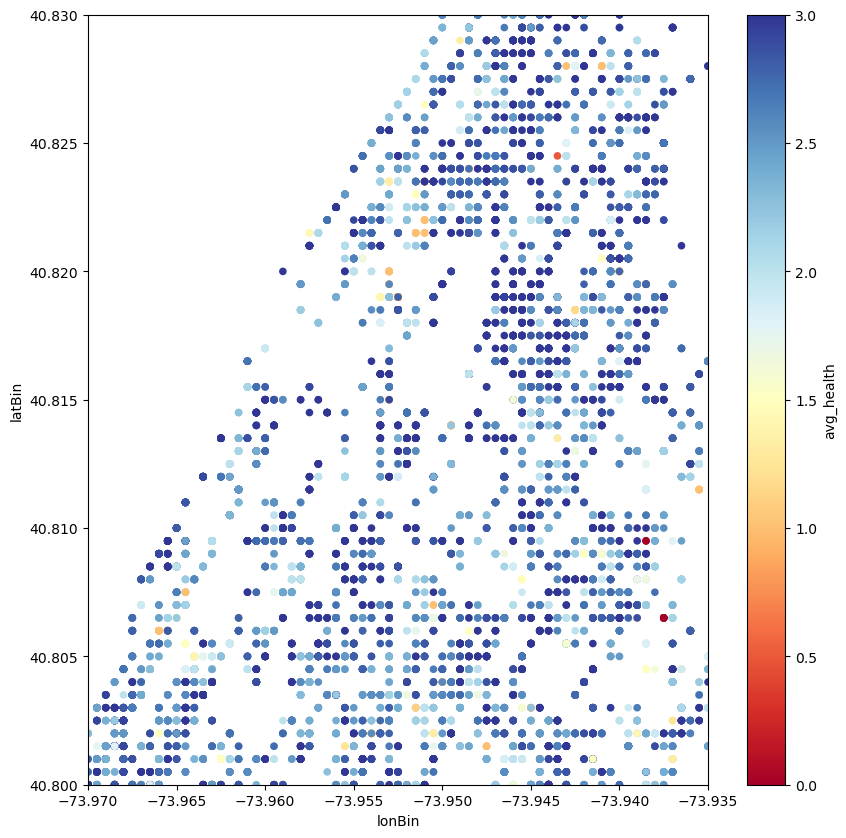

In [188]:
tree_data.plot(x="lonBin", y="latBin", kind="scatter", c="avg_health",
        colormap="RdYlBu")

plt.xlim(-73.97,-73.935)
plt.ylim( 40.8,40.83)

plt.gcf().set_size_inches(10, 10)

plt.show()


### Average health rounded to discrete values (0, 1, 2, 3), Binned trees

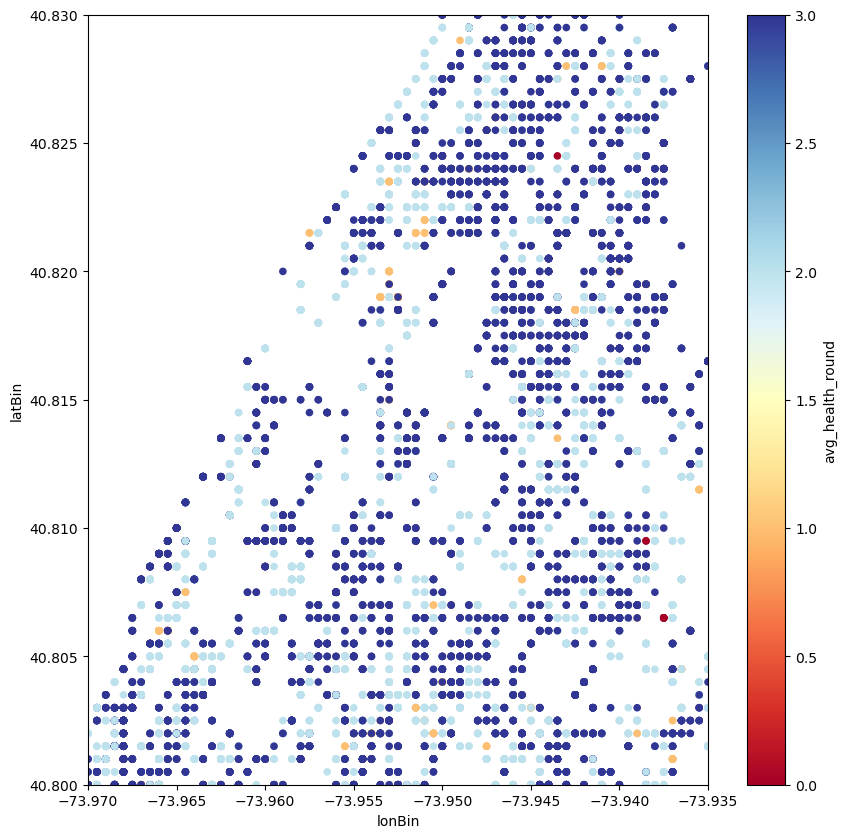

In [187]:

tree_data.plot(x="lonBin", y="latBin", kind="scatter", c="avg_health_round",
        colormap="RdYlBu")



plt.xlim(-73.97,-73.935)
plt.ylim( 40.8,40.83)

plt.gcf().set_size_inches(10, 10)

plt.show()
